#### Make the reaction step editing more automatic

In [1]:
import numpy as np

import pandas as pd
import amat_utils

from rdkit import Chem
from rdkit.Chem import AllChem, rdDistGeom
from rdkit.Chem import rdFMCS
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw, Atom
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.drawOptions.addAtomIndices = False
 
# from rdkit.Chem import rdDepictor
# rdDepictor.SetPreferCoordGen(True)
# IPythonConsole.ipython_3d = True

An example from AZF paper
target mol: CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1

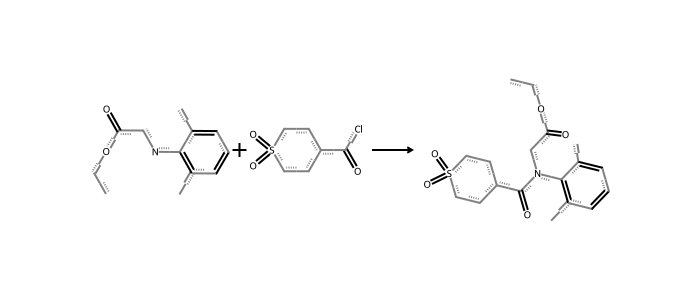

In [6]:
from rdkit.Chem import rdChemReactions
from rdkit.Chem.Draw import rdMolDraw2D
import io
from PIL import Image
rxn_1 = AllChem.ReactionFromSmarts("CC1=C(NCC(OCC)=O)C(C)=CC=C1.O=C(Cl)C1CCS(CC1)(=O)=O>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1")

drawer = rdMolDraw2D.MolDraw2DCairo(700,300)
drawer.drawOptions().useBWAtomPalette()
drawer.DrawReaction(rxn_1)
drawer.FinishDrawing()
bio = io.BytesIO(drawer.GetDrawingText())
Image.open(bio)


# rxn_2 = "CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1.NC1=CC=C(C2=NOC=N2)C=C1>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1"

In [15]:
r1 = Chem.MolFromSmiles("CC1=C(NCC(OCC)=O)C(C)=CC=C1")
r2 = Chem.MolFromSmiles("O=C(Cl)C1CCS(CC1)(=O)=O")
r3 = Chem.MolFromSmiles("CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1")
r4 = Chem.MolFromSmiles("NC1=CC=C(C2=NOC=N2)C=C1")
p_target = Chem.MolFromSmiles("CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1")

# Convert to smarts for reaction definition - not useful
# r1_smarts = Chem.MolToSmarts(r1)
# r2_smarts = Chem.MolToSmarts(r2)
# r3_smarts = Chem.MolToSmarts(r3)
# r4_smarts = Chem.MolToSmarts(r4)
# p_target_smarts = Chem.MolToSmarts(p_target)

In [ ]:
# reading the smiles string rxn won't work, it cannot highlight the changing atoms/bonds

# rxn_1 = AllChem.ReactionFromSmarts(f"{r1_smarts}.{r2_smarts}>>{r3_smarts}")
# rxn_2 = AllChem.ReactionFromSmarts(f"{r3_smarts}.{r4_smarts}>>{p_target_smarts}")
# print(type(rxn_1))
# IPythonConsole.molSize = (600,250)
# IPythonConsole.highlightByReactant = True


In [14]:
#ASKCOS template needs to be reversed
#This does not create anything after the run reaction
rxn = rdChemReactions.ReactionFromSmarts("Br-[c;H0;D3;+0:1](:[c:2]):[c:3].C-C1(-C)-O-B(-[c;H0;D3;+0:4](:[c:5]):[c:6])-O-C-1(-C)-C>>[c:5]:[c;H0;D3;+0:4](:[c:6])-[c;H0;D3;+0:1](:[c:2]):[c:3]")
reactants = [Chem.MolFromSmiles('Cc1ccc(B2OC(C)(C)C(C)(C)O2)cc1C'),  Chem.MolFromSmiles('Cc1ccc(Br)cc1C')]
prods = rxn.RunReactants(reactants)
prods

()

In [ ]:
from rxnmapper import RXNMapper

rxn_mapper = RXNMapper()
rxns = ["CC1=C(NCC(OCC)=O)C(C)=CC=C1.O=C(Cl)C1CCS(CC1)(=O)=O>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1","CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1.NC1=CC=C(C2=NOC=N2)C=C1>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1"]
# mapped_rxn = rxn_mapper.get_attention_guided_atom_maps([reaction])[0]['mapped_rxn']
results = rxn_mapper.get_attention_guided_atom_maps(rxns)
print(results[0]["mapped_rxn"])
print(results[1]["mapped_rxn"])

rxn1 = rdChemReactions.ReactionFromSmarts(results[0]["mapped_rxn"])
rxn2 = rdChemReactions.ReactionFromSmarts(results[1]["mapped_rxn"])
img = Draw.ReactionToImage(rxn2)
img.save("rxn2.png")
# img.show()


[CH3:1][CH2:2][O:3][C:4](=[O:5])[CH2:6][NH:7][c:18]1[c:19]([CH3:20])[cH:21][cH:22][cH:23][c:24]1[CH3:25].Cl[C:8](=[O:9])[CH:10]1[CH2:11][CH2:12][S:13](=[O:14])(=[O:15])[CH2:16][CH2:17]1>>[CH3:1][CH2:2][O:3][C:4](=[O:5])[CH2:6][N:7]([C:8](=[O:9])[CH:10]1[CH2:11][CH2:12][S:13](=[O:14])(=[O:15])[CH2:16][CH2:17]1)[c:18]1[c:19]([CH3:20])[cH:21][cH:22][cH:23][c:24]1[CH3:25]
CCO[C:11]([CH2:10][N:9]([c:8]1[c:2]([CH3:1])[cH:3][cH:4][cH:5][c:6]1[CH3:7])[C:25](=[O:26])[CH:27]1[CH2:28][CH2:29][S:30](=[O:31])(=[O:32])[CH2:33][CH2:34]1)=[O:12].[NH2:13][c:14]1[cH:15][cH:16][c:17](-[c:18]2[n:19][cH:20][o:21][n:22]2)[cH:23][cH:24]1>>[CH3:1][c:2]1[cH:3][cH:4][cH:5][c:6]([CH3:7])[c:8]1[N:9]([CH2:10][C:11](=[O:12])[NH:13][c:14]1[cH:15][cH:16][c:17](-[c:18]2[n:19][cH:20][o:21][n:22]2)[cH:23][cH:24]1)[C:25](=[O:26])[CH:27]1[CH2:28][CH2:29][S:30](=[O:31])(=[O:32])[CH2:33][CH2:34]1


### Try MCS (3D maximum common substructure)

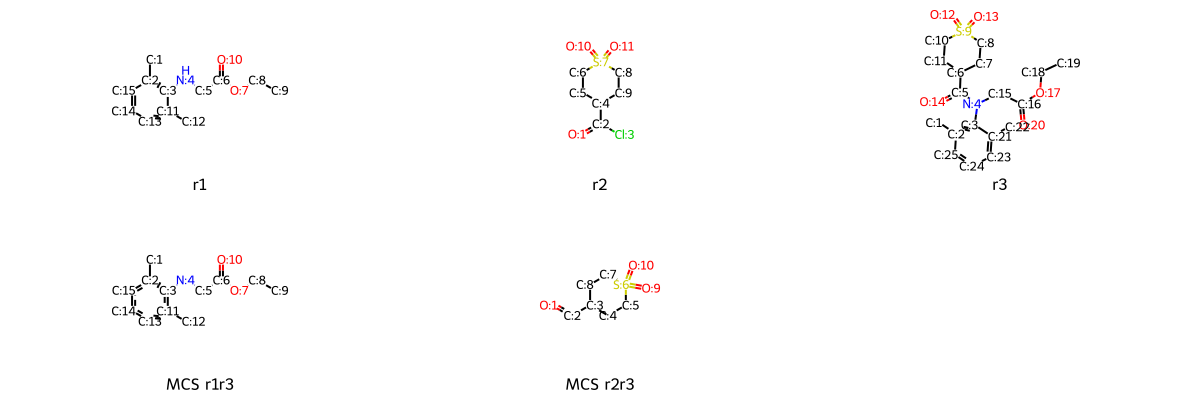

In [31]:
# set True in completeRingsOnly and ringMatchesRingOnly not really useful here.
mcs_true = rdFMCS.FindMCS([r1, r3], completeRingsOnly=True, ringMatchesRingOnly=True, timeout=10) 

MCS_r1r3 = rdFMCS.FindMCS([r1, r3],atomCompare=rdFMCS.AtomCompare.CompareAnyHeavyAtom, bondCompare=rdFMCS.BondCompare.CompareOrderExact)
MCS_r2r3 = rdFMCS.FindMCS([r2, r3])

mol_MCS_r1r3 = Chem.MolFromSmarts(MCS_r1r3.smartsString)
mol_MCS_r2r3 = Chem.MolFromSmarts(MCS_r2r3.smartsString)

legends = ['r1', 'r2', 'r3', 'MCS r1r3', 'MCS r2r3']
mol_index = [amat_utils.mol_with_atom_index(mol) for mol in [r1, r2, r3, mol_MCS_r1r3, mol_MCS_r2r3]]
Draw.MolsToGridImage(mol_index, molsPerRow=3, subImgSize=(400,200), legends=legends)
# Draw.MolToImage(r1, includeAtomNumbers=True)

# # The below two SMILES text are identical in ChemDraw illustration!
# print("r1", Chem.MolToSmiles(r1))
# print("MCS r1r3:", Chem.MolToSmiles(mol_MCS_r1r3))


In [ ]:
amat_r1 = Chem.GetAdjacencyMatrix(r1,useBO=True,force=True)
amat_MCS_r1r3 = Chem.GetAdjacencyMatrix(mol_MCS_r1r3,useBO=True,force=True)
amat_r2 = Chem.GetAdjacencyMatrix(r2,useBO=True,force=True)
amat_MCS_r2r3 = Chem.GetAdjacencyMatrix(mol_MCS_r2r3,useBO=True,force=True)


print(amat_r1.shape)
print(amat_MCS_r1r3.shape)
print(amat_r2.shape)
print(amat_MCS_r2r3.shape)

In [ ]:

for i, atom in enumerate(p_target.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()+1))
p_target


In [ ]:

MCS_r3p = rdFMCS.FindMCS([r3, p_target])
MCS_r4p = rdFMCS.FindMCS([r4, p_target])

mol_MCS_r3p = Chem.MolFromSmarts(MCS_r3p.smartsString)
mol_MCS_r4p = Chem.MolFromSmarts(MCS_r4p.smartsString)

# mol_MCS_r3p = Chem.AddHs(mol_MCS_r3p)
# mol_MCS_r4p = Chem.AddHs(mol_MCS_r4p)

legends = ['r3', 'r4', 'p', 'MCS r3p', 'MCS r4p']
# mol_index = [amat_utils.mol_with_atom_index(mol) for mol in [r1, r2, p_target, mol_MCS_r1r3, mol_MCS_r2r3]]
mols = [amat_utils.mol_with_atom_index(r3), r4, p_target, amat_utils.mol_with_atom_index(mol_MCS_r3p), mol_MCS_r4p]
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(400,200), legends=legends)

In [ ]:
amat_r3 = Chem.GetAdjacencyMatrix(r3,useBO=True,force=True)
amat_MCS_r3p = Chem.GetAdjacencyMatrix(mol_MCS_r3p,useBO=True,force=True)
amat_r4 = Chem.GetAdjacencyMatrix(r4,useBO=True,force=True)
amat_MCS_r4p = Chem.GetAdjacencyMatrix(mol_MCS_r4p,useBO=True,force=True)

print([atm.GetSymbol() for atm in r3.GetAtoms()])
print([atm.GetSymbol() for atm in mol_MCS_r3p.GetAtoms()])

print(amat_r3)
print(amat_MCS_r3p)

In [ ]:
all_reactants = Chem.MolFromSmiles("CC1=C(NCC(OCC)=O)C(C)=CC=C1.O=C(Cl)C1CCS(CC1)(=O)=O.NC1=CC=C(C2=NOC=N2)C=C1")
for i, atom in enumerate(all_reactants.GetAtoms()):
    # For each atom, set the property "molAtomMapNumber" to a custom number, let's say, the index of the atom in the molecule
    atom.SetProp("molAtomMapNumber", str(atom.GetIdx()+1))

atom_Num = all_reactants.GetNumAtoms()
all_atoms_symbol = [atm.GetSymbol() for atm in all_reactants.GetAtoms()]
all_atoms_atomic = [atm.GetAtomicNum() for atm in all_reactants.GetAtoms()]

print("number of atoms in all reactants:", atom_Num)
print("atom list",all_atoms_symbol)

amat_all_reactants = Chem.GetAdjacencyMatrix(all_reactants,useBO=True,force=True)

# List all identical numbers (excluding zeros) in the adjacency matrix
unique_vals, counts = np.unique(amat_all_reactants[amat_all_reactants != 0], return_counts=True)
identical_numbers = unique_vals[counts > 1]
print("Identical numbers in amat_all_reactants (excluding zeros):", identical_numbers)

save_dict = {"amats":[amat_all_reactants],"atoms":all_atoms_atomic}
np.savez("./matrices/AZF_test",**save_dict)


In [ ]:
all_reactants

In [ ]:
# from localmapper import localmapper
# mapper = localmapper()
# rxns = ['CC1=C(NCC(OCC)=O)C(C)=CC=C1.O=C(Cl)C1CCS(CC1)(=O)=O>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1','CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(OCC)=O)C(C)=CC=C1.NC1=CC=C(C2=NOC=N2)C=C1>>CC1=C(N(C(C2CCS(CC2)(=O)=O)=O)CC(NC3=CC=C(C4=NOC=N4)C=C3)=O)C(C)=CC=C1']
# result = mapper.get_atom_map(rxns)

## Test: Highlighting changing atoms and bonds in reactions
ref: https://greglandrum.github.io/rdkit-blog/posts/2021-11-26-highlighting-changed-bonds-in-reactions.html


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdChemReactions
import rdkit
print(rdkit.__version__)

In [ ]:
rxn1 = rdChemReactions.ReactionFromRxnBlock('''$RXN

      Mrv2102  111820212128

  2  1
$MOL

  Mrv2102 11182121282D          

 13 13  0  0  0  0            999 V2000
   -7.5723    2.6505    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
   -6.8579    2.2380    0.0000 O   0  0  0  0  0  0  0  0  0  2  0  0
   -6.8580    1.4130    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
   -6.1435    1.0004    0.0000 O   0  0  0  0  0  0  0  0  0  4  0  0
   -7.5725    1.0005    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
   -7.5725    0.1755    0.0000 N   0  0  0  0  0  0  0  0  0  6  0  0
   -8.2869   -0.2369    0.0000 C   0  0  0  0  0  0  0  0  0  7  0  0
   -8.2870   -1.0620    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0
   -9.0015   -1.4745    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0
   -9.0015   -2.2995    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0
   -8.2870   -2.7120    0.0000 C   0  0  0  0  0  0  0  0  0 11  0  0
   -7.5726   -2.2995    0.0000 C   0  0  0  0  0  0  0  0  0 12  0  0
   -7.5726   -1.4745    0.0000 C   0  0  0  0  0  0  0  0  0 13  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  2  0  0  0  0
  3  5  1  0  0  0  0
  5  6  1  0  0  0  0
  6  7  2  0  0  0  0
  7  8  1  0  0  0  0
  8  9  1  0  0  0  0
  8 13  2  0  0  0  0
  9 10  2  0  0  0  0
 10 11  1  0  0  0  0
 11 12  2  0  0  0  0
 12 13  1  0  0  0  0
M  END
$MOL

  Mrv2102 11182121282D          

 12 11  0  0  0  0            999 V2000
   -3.7934    0.7703    0.0000 C   0  0  0  0  0  0  0  0  0 14  0  0
   -3.0790    1.1828    0.0000 C   0  0  0  0  0  0  0  0  0 15  0  0
   -2.3645    0.7703    0.0000 C   0  0  0  0  0  0  0  0  0 16  0  0
   -3.7934   -0.0547    0.0000 C   0  0  0  0  0  0  0  0  0 17  0  0
   -4.5078   -0.4672    0.0000 O   0  0  0  0  0  0  0  0  0 18  0  0
   -3.0789   -0.4671    0.0000 O   0  0  0  0  0  0  0  0  0 19  0  0
   -1.6500    1.1828    0.0000 O   0  0  0  0  0  0  0  0  0 20  0  0
   -2.3645   -0.0547    0.0000 O   0  0  0  0  0  0  0  0  0 21  0  0
   -3.0788   -1.2922    0.0000 C   0  0  0  0  0  0  0  0  0 22  0  0
   -1.6500   -0.4672    0.0000 C   0  0  0  0  0  0  0  0  0 23  0  0
   -2.3644   -1.7046    0.0000 C   0  0  0  0  0  0  0  0  0 24  0  0
   -1.6500   -1.2922    0.0000 C   0  0  0  0  0  0  0  0  0 25  0  0
  1  2  2  0  0  0  0
  1  4  1  0  0  0  0
  2  3  1  0  0  0  0
  3  7  2  0  0  0  0
  3  8  1  0  0  0  0
  4  5  2  0  0  0  0
  4  6  1  0  0  0  0
  6  9  1  0  0  0  0
  8 10  1  0  0  0  0
  9 11  1  0  0  0  0
 10 12  1  0  0  0  0
M  END
$MOL

  Mrv2102 11182121282D          

 25 26  0  0  0  0            999 V2000
    5.1328    0.9532    0.0000 C   0  0  0  0  0  0  0  0  0  5  0  0
    5.8002    0.4683    0.0000 N   0  0  0  0  0  0  0  0  0  6  0  0
    5.5453   -0.3163    0.0000 C   0  0  0  0  0  0  0  0  0  7  0  0
    4.7203   -0.3163    0.0000 C   0  0  0  0  0  0  0  0  0 14  0  0
    4.4654    0.4683    0.0000 C   0  0  0  0  0  0  0  0  0 15  0  0
    5.1328    1.7782    0.0000 C   0  0  0  0  0  0  0  0  0  3  0  0
    3.6807    0.7232    0.0000 C   0  0  0  0  0  0  0  0  0 16  0  0
    4.2354   -0.9838    0.0000 C   0  0  0  0  0  0  0  0  0 17  0  0
    6.0302   -0.9838    0.0000 C   0  0  0  0  0  0  0  0  0  8  0  0
    6.8507   -0.8975    0.0000 C   0  0  0  0  0  0  0  0  0  9  0  0
    7.3356   -1.5650    0.0000 C   0  0  0  0  0  0  0  0  0 10  0  0
    7.0001   -2.3187    0.0000 C   0  0  0  0  0  0  0  0  0 11  0  0
    6.1796   -2.4049    0.0000 C   0  0  0  0  0  0  0  0  0 12  0  0
    5.6947   -1.7375    0.0000 C   0  0  0  0  0  0  0  0  0 13  0  0
    3.4149   -0.8975    0.0000 O   0  0  0  0  0  0  0  0  0 18  0  0
    4.5709   -1.7375    0.0000 O   0  0  0  0  0  0  0  0  0 19  0  0
    4.0860   -2.4049    0.0000 C   0  0  0  0  0  0  0  0  0 22  0  0
    3.2655   -2.3187    0.0000 C   0  0  0  0  0  0  0  0  0 24  0  0
    3.5092    1.5302    0.0000 O   0  0  0  0  0  0  0  0  0 20  0  0
    3.0676    0.1712    0.0000 O   0  0  0  0  0  0  0  0  0 21  0  0
    2.2830    0.4261    0.0000 C   0  0  0  0  0  0  0  0  0 23  0  0
    1.6699   -0.1259    0.0000 C   0  0  0  0  0  0  0  0  0 25  0  0
    5.8473    2.1907    0.0000 O   0  0  0  0  0  0  0  0  0  4  0  0
    4.4183    2.1907    0.0000 O   0  0  0  0  0  0  0  0  0  2  0  0
    4.4183    3.0157    0.0000 C   0  0  0  0  0  0  0  0  0  1  0  0
  1  2  1  0  0  0  0
  2  3  1  0  0  0  0
  3  4  1  0  0  0  0
  4  5  1  0  0  0  0
  1  5  1  0  0  0  0
  1  6  1  0  0  0  0
  5  7  1  0  0  0  0
  4  8  1  0  0  0  0
  3  9  1  0  0  0  0
 10 11  2  0  0  0  0
 11 12  1  0  0  0  0
 12 13  2  0  0  0  0
 13 14  1  0  0  0  0
  9 10  1  0  0  0  0
  9 14  2  0  0  0  0
  8 15  2  0  0  0  0
  8 16  1  0  0  0  0
 16 17  1  0  0  0  0
 17 18  1  0  0  0  0
  7 19  2  0  0  0  0
  7 20  1  0  0  0  0
 20 21  1  0  0  0  0
 21 22  1  0  0  0  0
  6 23  2  0  0  0  0
  6 24  1  0  0  0  0
 24 25  1  0  0  0  0
M  END
''')